In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def model(dic, obs, turns):
    p = np.zeros(shape=(turns+1,obs))
    p[0] = dic['init']
    for i in range(turns):
        random = np.random.normal(0, 1/9*dic['a']**2 , obs)
        a = dic['a'] + random
        a1 = dic['r'] * a * dic['c'] * (a * p[i]).sum()
        a2 = dic['r'] * (a*dic['b'] - dic['d'] - dic['pen2'])
        a3 = dic['r'] * (dic['sup'] - dic['pen1'])
        a4 = dic['pen3']
        p[i+1] = (a1*p[i] + a2*p[i] + a3 - a4*p[i]**2)* dic['r'] + p[i]
        p[i+1][p[i+1]<0] = 0
    return pd.DataFrame(p)

In [3]:
parameters = {'a': 1,
              'b': 3,
              'c':-0.0003,
              'd': 1,
              'pen1': 3,
              'pen2': 0.2,
              'pen3': 0.0001,
              'sup': 0,
              'r': 1}

## Model 1: A fair game

In [4]:
obs = 5
init_values = np.array([100, 100, 100, 100, 100])
parameters = {'init': init_values,
              'a': np.full(obs,1),
              'b': np.full(obs,3),
              'c': np.full(obs,-0.0003),
              'd': np.full(obs,1),
              'pen1': np.array([0, 0, 0, 0, 0]),
              'pen2': np.array([0, 0, 0, 0, 0]),
              'pen3': np.array([0, 0, 0, 0, 0]),
              'sup': np.array([0, 0, 0, 0, 0]),
              'r': np.full(obs,1)}

Text(0,0.5,'Population')

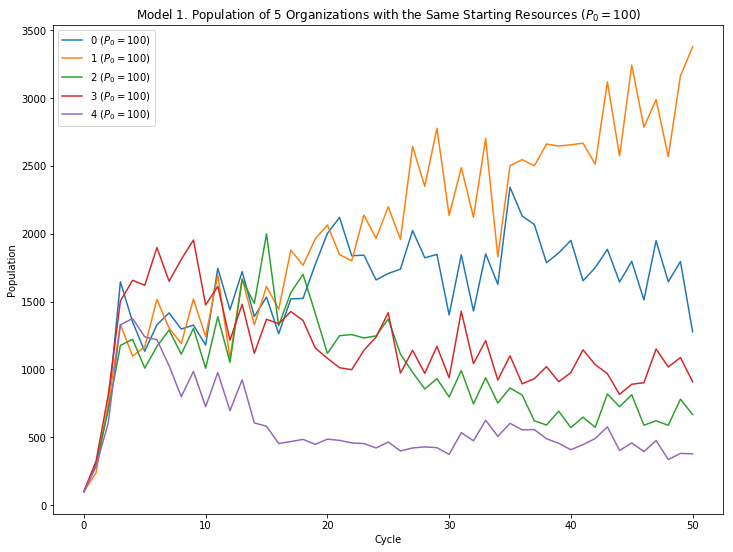

In [5]:
result = model(parameters, obs, 50)
plt.figure(figsize=(12,9))
plt.plot(result[0], label='0 ($P_0 = 100$)')
plt.plot(result[1], label='1 ($P_0 = 100$)')
plt.plot(result[2], label='2 ($P_0 = 100$)')
plt.plot(result[3], label='3 ($P_0 = 100$)')
plt.plot(result[4], label='4 ($P_0 = 100$)')
plt.legend(loc='best')
plt.title('Model 1. Population of 5 Organizations with the Same Starting Resources ($P_0 = 100$)')
plt.xlabel('Cycle')
plt.ylabel('Population')

## Model 2. Unequal starting points

In [6]:
init_values = np.array([1000, 500, 200, 100, 50])
parameters = {'init': init_values,
              'a': np.full(obs,1),
              'b': np.full(obs,3),
              'c': np.full(obs,-0.0003),
              'd': np.full(obs,1),
              'pen1': np.array([0, 0, 0, 0, 0]),
              'pen2': np.array([0, 0, 0, 0, 0]),
              'pen3': np.array([0, 0, 0, 0, 0]),
              'sup': np.array([0, 0, 0, 0, 0]),
              'r': np.full(obs,1)}

Text(0,0.5,'Population')

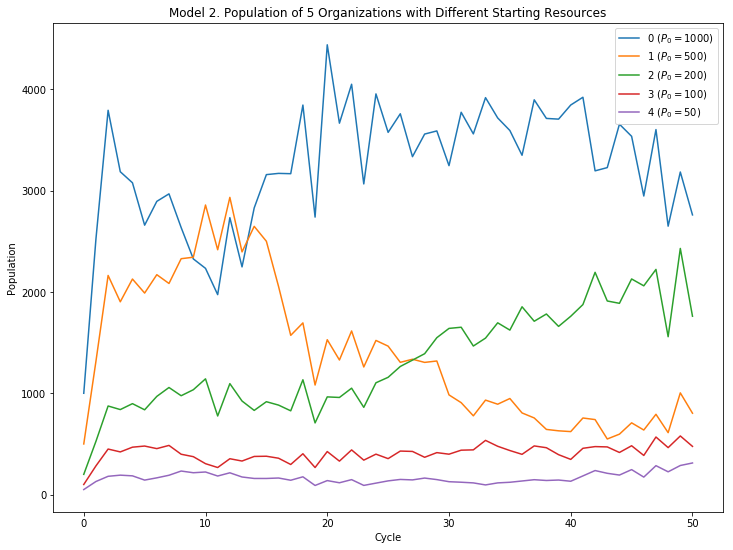

In [7]:
result = model(parameters, obs, 50)
plt.figure(figsize=(12,9))
plt.plot(result[0], label='0 ($P_0 = 1000$)')
plt.plot(result[1], label='1 ($P_0 = 500$)')
plt.plot(result[2], label='2 ($P_0 = 200$)')
plt.plot(result[3], label='3 ($P_0 = 100$)')
plt.plot(result[4], label='4 ($P_0 = 50$)')
plt.legend(loc='best')
plt.title('Model 2. Population of 5 Organizations with Different Starting Resources')
plt.xlabel('Cycle')
plt.ylabel('Population')

## Model 3: Government interferes with providing funding to some organizations.

In [8]:
init_values = np.array([1000, 500, 200, 100, 50])
parameters = {'init': init_values,
              'a': np.full(obs,1),
              'b': np.full(obs,3),
              'c': np.full(obs,-0.0003),
              'd': np.full(obs,1),
              'pen1': np.array([0, 0, 0, 0, 0]),
              'pen2': np.array([0, 0, 0, 0, 0]),
              'pen3': np.array([0, 0, 0, 0, 0]),
              'sup': np.array([0, 100, 300, 0, 0]),
              'r': np.full(obs,1)}

Text(0,0.5,'Population')

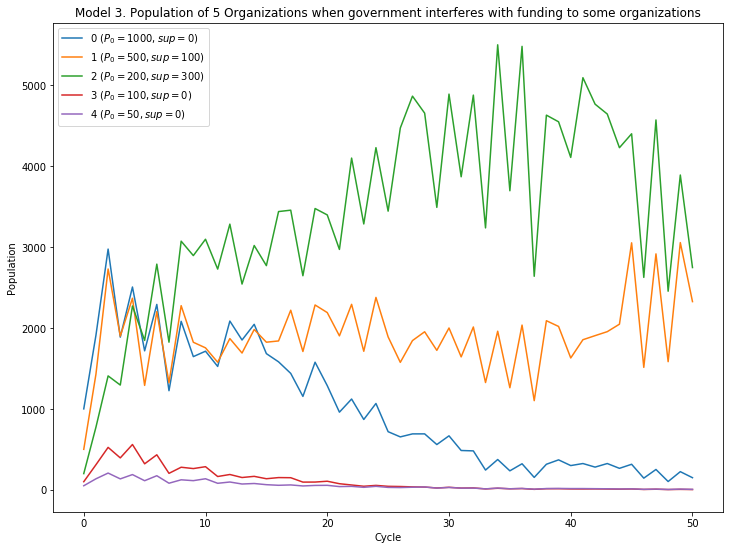

In [9]:
result = model(parameters, obs, 50)
plt.figure(figsize=(12,9))
plt.plot(result[0], label='0 ($P_0 = 1000, sup = 0$)')
plt.plot(result[1], label='1 ($P_0 = 500, sup = 100$)')
plt.plot(result[2], label='2 ($P_0 = 200, sup = 300$)')
plt.plot(result[3], label='3 ($P_0 = 100, sup = 0$)')
plt.plot(result[4], label='4 ($P_0 = 50, sup = 0$)')
plt.legend(loc='best')
plt.title('Model 3. Population of 5 Organizations when government interferes with funding to some organizations')
plt.xlabel('Cycle')
plt.ylabel('Population')

## Model 4: Government Interfere with emerging (1st) penalty.

In [10]:
init_values = np.array([1000, 500, 200, 100, 50])
parameters = {'init': init_values,
              'a': np.full(obs,1),
              'b': np.full(obs,3),
              'c': np.full(obs,-0.0003),
              'd': np.full(obs,1),
              'pen1': np.array([100, 100, 100, 100, 100]),
              'pen2': np.array([0, 0, 0, 0, 0]),
              'pen3': np.array([0, 0, 0, 0, 0]),
              'sup': np.array([0, 0, 0, 0, 0]),
              'r': np.full(obs,1)}

Text(0,0.5,'Population')

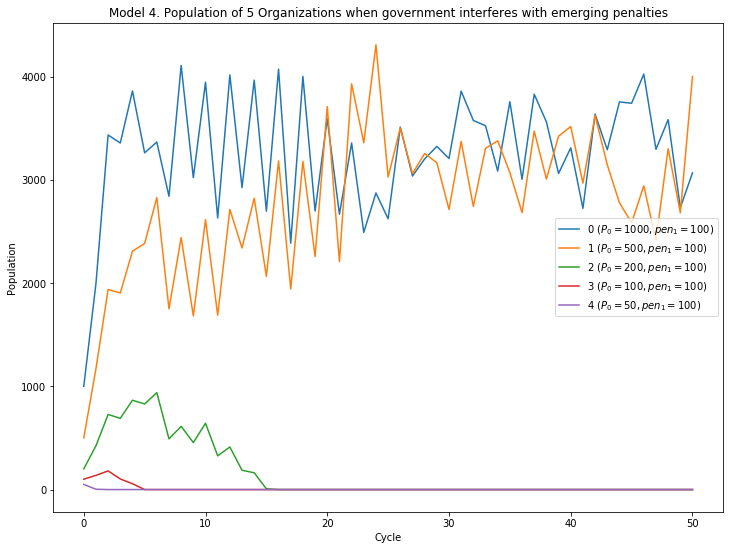

In [11]:
result = model(parameters, obs, 50)
plt.figure(figsize=(12,9))
plt.plot(result[0], label='0 ($P_0 = 1000, pen_1 = 100$)')
plt.plot(result[1], label='1 ($P_0 = 500, pen_1 = 100$)')
plt.plot(result[2], label='2 ($P_0 = 200, pen_1 = 100$)')
plt.plot(result[3], label='3 ($P_0 = 100, pen_1 = 100$)')
plt.plot(result[4], label='4 ($P_0 = 50, pen_1 = 100$)')
plt.legend(loc='best')
plt.title('Model 4. Population of 5 Organizations when government interferes with emerging penalties')
plt.xlabel('Cycle')
plt.ylabel('Population')

## Model 5: Government Interfere with growing (2nd) penalty.

In [12]:
init_values = np.array([1000, 500, 200, 100, 50])
parameters = {'init': init_values,
              'a': np.full(obs,1),
              'b': np.full(obs,3),
              'c': np.full(obs,-0.0003),
              'd': np.full(obs,1),
              'pen1': np.array([0, 0, 0, 0, 0]),
              'pen2': np.array([0.2, 0.2, 0.2, 0.2, 0.2]),
              'pen3': np.array([0, 0, 0, 0, 0]),
              'sup': np.array([0, 0, 0, 0, 0]),
              'r': np.full(obs,1)}

Text(0,0.5,'Population')

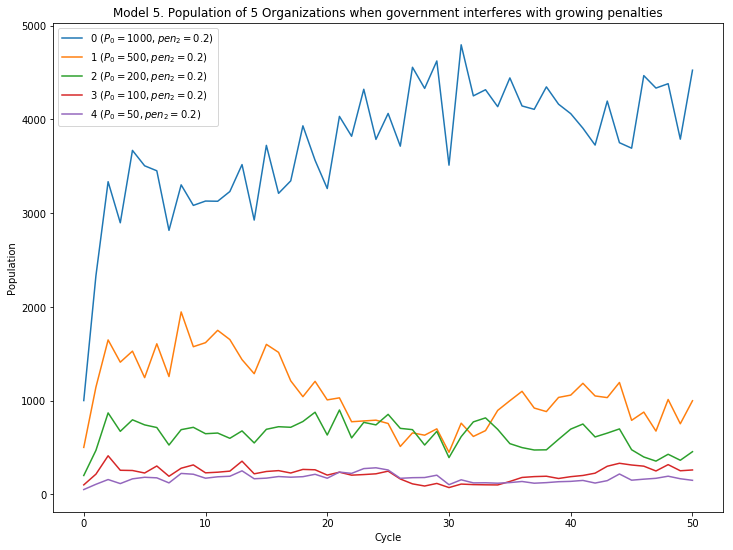

In [13]:
result = model(parameters, obs, 50)
plt.figure(figsize=(12,9))
plt.plot(result[0], label='0 ($P_0 = 1000, pen_2 = 0.2$)')
plt.plot(result[1], label='1 ($P_0 = 500, pen_2 = 0.2$)')
plt.plot(result[2], label='2 ($P_0 = 200, pen_2 = 0.2$)')
plt.plot(result[3], label='3 ($P_0 = 100, pen_2 = 0.2$)')
plt.plot(result[4], label='4 ($P_0 = 50, pen_2 = 0.2$)')
plt.legend(loc='best')
plt.title('Model 5. Population of 5 Organizations when government interferes with growing penalties')
plt.xlabel('Cycle')
plt.ylabel('Population')

## Model 6: Government Interfere with threat-preventing (3rd) penalty.

In [14]:
init_values = np.array([1000, 500, 200, 100, 50])
parameters = {'init': init_values,
              'a': np.full(obs,1),
              'b': np.full(obs,3),
              'c': np.full(obs,-0.0003),
              'd': np.full(obs,1),
              'pen1': np.array([0, 0, 0, 0, 0]),
              'pen2': np.array([0, 0, 0, 0, 0]),
              'pen3': np.array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001]),
              'sup': np.array([0, 0, 0, 0, 0]),
              'r': np.full(obs,1)}

Text(0,0.5,'Population')

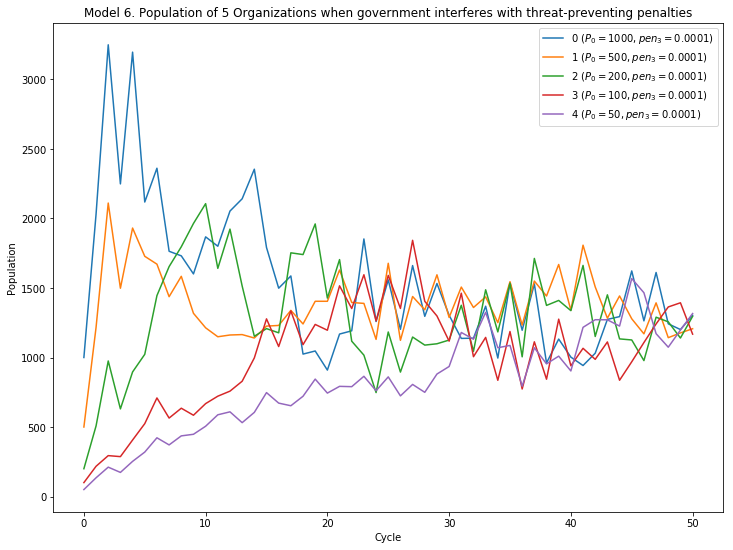

In [15]:
result = model(parameters, obs, 50)
plt.figure(figsize=(12,9))
plt.plot(result[0], label='0 ($P_0 = 1000, pen_3 = 0.0001$)')
plt.plot(result[1], label='1 ($P_0 = 500, pen_3 = 0.0001$)')
plt.plot(result[2], label='2 ($P_0 = 200, pen_3 = 0.0001$)')
plt.plot(result[3], label='3 ($P_0 = 100, pen_3 = 0.0001$)')
plt.plot(result[4], label='4 ($P_0 = 50, pen_3 = 0.0001$)')
plt.legend(loc='best')
plt.title('Model 6. Population of 5 Organizations when government interferes with threat-preventing penalties')
plt.xlabel('Cycle')
plt.ylabel('Population')

## Summary

Text(0,0.5,'Population')

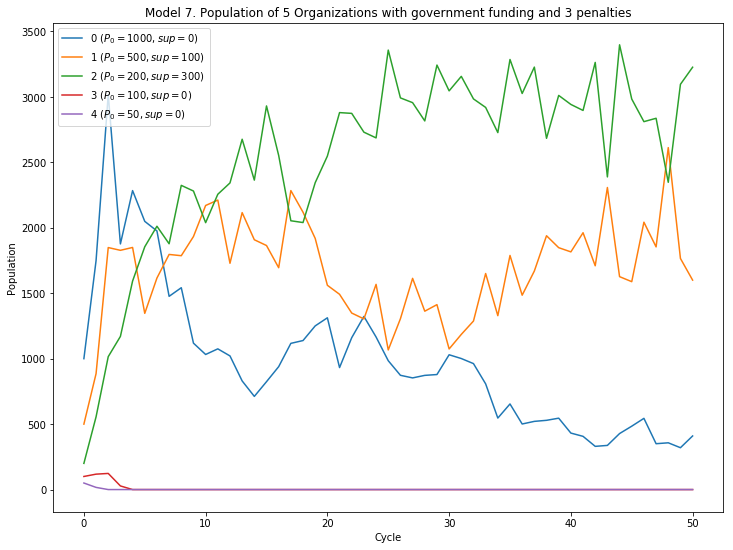

In [16]:
init_values = np.array([1000, 500, 200, 100, 50])
parameters = {'init': init_values,
              'a': np.full(obs,1),
              'b': np.full(obs,3),
              'c': np.full(obs,-0.0003),
              'd': np.full(obs,1),
              'pen1': np.array([100, 100, 100, 100, 100]),
              'pen2': np.array([0.2, 0.2, 0.2, 0.2, 0.2]),
              'pen3': np.array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001]),
              'sup': np.array([0, 100, 300, 0, 0]),
              'r': np.full(obs,1)}
result = model(parameters, obs, 50)
plt.figure(figsize=(12,9))
plt.plot(result[0], label='0 ($P_0 = 1000, sup = 0$)')
plt.plot(result[1], label='1 ($P_0 = 500, sup = 100$)')
plt.plot(result[2], label='2 ($P_0 = 200, sup = 300$)')
plt.plot(result[3], label='3 ($P_0 = 100, sup = 0$)')
plt.plot(result[4], label='4 ($P_0 = 50, sup = 0$)')
plt.legend(loc='best')
plt.title('Model 7. Population of 5 Organizations with government funding and 3 penalties')
plt.xlabel('Cycle')
plt.ylabel('Population')

In [17]:
((parameters['a'] + np.random.normal(0,1/9*parameters['a']**2,obs)) * parameters['init']).sum()

2055.760819059152

In [18]:
obs = 5
init_values = np.array([100, 10, 10, 10, 10])
parameters = {'init': init_values,
              'a': np.full(obs,1),
              'b': np.full(obs,3),
              'c': np.full(obs,-0.0003),
              'd': np.full(obs,1),
              'pen1': np.full(obs, 0),
              'pen2': np.full(obs, 0),
              'pen3': np.full(obs, 0),
              'sup': np.array([0, 0, 0, 0, 0]),
              'r': np.full(obs,1)}

Text(0.5,1,'Simulation Result of 5 Organizations with the Same Starting Resources')

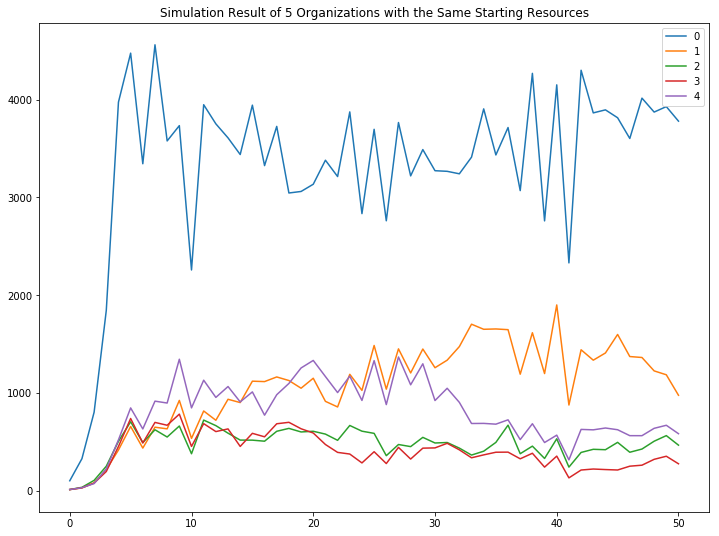

In [19]:
result = model(parameters, obs, 50)
plt.figure(figsize=(12,9))
plt.plot(result[0])
plt.plot(result[1])
plt.plot(result[2])
plt.plot(result[3])
plt.plot(result[4])
plt.legend(loc='best')
plt.title('Simulation Result of 5 Organizations with the Same Starting Resources')

In [20]:
def model_2eh(dic, obs):
    p = np.zeros(shape=(11,obs))
    p[0] = dic['init']
    for i in range(10):
        random = np.random.normal(0, 1/9*dic['a'] , obs)
        a = dic['a'] + random
        a1 = dic['r'] * a * dic['c'] * (a * p[i]).sum()
        a2 = dic['r'] * (a*dic['b'] - dic['d'] - dic['pen'])
        a3 = dic['r'] * (dic['sup'] )
        p[i+1] = (a1*p[i] + a2*p[i] + a3)* dic['r']
        print(p[i+1])
        p[i+1][p[i+1]<0] = 0
    return p    

In [ ]:
def model_1(dic, p):
    random = np.random.normal(0,1/9*dic['a'],10)
    for i in range(10):
        a = dic['a'] + random[i]
        a1 =  dic['r'] * a**2 * dic['c']
        a2 = dic['r'] * (a*dic['b'] - dic['d'])
        a3 = dic['r'] * (dic['sup'] - dic['pen'])
        p = (a1*p**2 + a2*p + a3)* dic['r']
        print(p)
        if p <= 0:
            return 0
    return p

In [ ]:
def model_1e(dic, p):
    for i in range(10):
        random = np.random.normal(0,1/9*dic['a'],len(p))
        a = dic['a'] + random
        a1 =  dic['r'] * a * dic['c'] * a * p.sum()
        a2 = dic['r'] * (a*dic['b'] - dic['d'])
        a3 = dic['r'] * (dic['sup'] - dic['pen'])
        p = (a1*p + a2*p + a3)* dic['r']
        print(p)
        for i in range(len(p)):
            if p[i] < 0:
                p[i] = 0
    return p

In [ ]:
model_1e(parameters, np.array([1000, 10, 10, 10, 10]))

In [ ]:
def model_2(dic, p):
    random = np.random.normal(0,1/9*dic['a'],100)
    a1 = (dic['a'])**2 * dic['c']
    a2 = dic['a']*dic['b']-dic['d']-dic['pen']
    a3 = dic['sup']
    r = dic['r']
    for i in range(100):
        a = dic['a'] + random[i]
        a1 =  dic['r'] * a**2 * dic['c']
        a2 = dic['r'] * (a*dic['b'] - dic['d'] - dic['pen'])
        a3 = dic['r'] * dic['sup']
        p = (a1*p**2 + a2*p + a3)* r
        print(p)
        if p <= 0:
            return 0
    return p

In [ ]:
def model_3(dic, p):
    random = np.random.normal(0,1/9*dic['a'],100)
    a1 = (dic['a'])**2 * dic['c'] - dic['pen']
    a2 = dic['a']*dic['b']-dic['d']
    a3 = dic['sup']
    r = dic['r']
    for i in range(100):
        a = dic['a'] + random[i]
        a1 =  dic['r'] * a**2 * dic['c']
        a2 = dic['r'] * (a*dic['b'] - dic['d'] - dic['pen'])
        a3 = dic['r'] * dic['sup']
        p = (a1*p**2 + a2*p + a3)* r
        if p <= 0:
            return 0
    return p